<style>
body {
    background-color: #FF5A00;
    color: white;
    font-family: Arial, sans-serif;
}
h1, h2, h3 {
    color: white;
}
</style>

# Documentación del Notebook

## Propósito

Este notebook tiene como objetivo extraer, procesar y almacenar noticias deportivas provenientes de los canales RSS de ESPN. Se enfoca en tres deportes principales: **NFL**, **NBA** y **MLB**, organizando la información en un formato estructurado para su análisis y almacenamiento.

## Flujo de Trabajo

1. **Instalación de Dependencias**:
   - Se instalan las bibliotecas necesarias, como `pandas` y `feedparser`, para manejar datos y procesar los feeds RSS.

2. **Extracción de Datos**:
   - Se accede a los canales RSS de ESPN para las secciones de NFL, NBA y MLB.
   - Se recopilan las noticias, incluyendo información como:
     - Sección (deporte)
     - Título
     - Descripción
     - Autor
     - Fecha de publicación

3. **Procesamiento de Datos**:
   - Los datos extraídos se almacenan en una lista estructurada y posteriormente se convierten en un DataFrame de `pandas` para facilitar su manipulación.

4. **Almacenamiento**:
   - El DataFrame resultante se guarda en un archivo CSV (`posts_deportes_espn.csv`) para su uso posterior.

## Variables Clave

- **`deportes`**: Lista de deportes a procesar (`['nfl', 'nba', 'mlb']`).
- **`posts`**: Lista que almacena las noticias extraídas.
- **`df`**: DataFrame de `pandas` que contiene las noticias estructuradas.
- **`url_canal`**: URL del canal RSS correspondiente a cada deporte.

## Resultado

El notebook genera un archivo CSV con las noticias deportivas organizadas, listo para ser utilizado en análisis de datos, visualizaciones o cualquier otro propósito relacionado.

In [47]:
pip install pandas feedparser nltk matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [48]:
import pandas as pd
import feedparser

In [49]:
deportes=['nfl','nba','mlb']
posts=[]
for deporte in deportes:
    url_canal = 'https://www.espn.com/espn/rss/' + deporte + '/news'
    feed = feedparser.parse(url_canal)
    feed_entries = feed.entries
    for entry in feed_entries:
        section = deporte
        title=entry.title
        description=entry.description
        creator = entry.author if hasattr(entry, 'author') else 'Unknown'
        date=entry.published
        posts.append((section,title,description,creator,date))


In [50]:
# Guardando las noticias en un df de pandas

df = pd.DataFrame(posts, columns=['section','title','description', 'creator', 'date'])
df

,section,title,description,creator,date
0,nfl,Lingering questions on 13 second-year NFL rece...,Can Marvin Harrison Jr. turn it around? Is Lad...,Ben Solak,"Tue, 13 May 2025 08:52:08 EST"
1,nfl,Vikings draw historic double in international ...,The Vikings will become the first team in NFL ...,Unknown,"Tue, 13 May 2025 09:33:07 EST"
2,nfl,"Eagles, Pack to square off in MNF tush push tilt","The first game announced on the ""Monday Night ...",Jamison Hensley,"Tue, 13 May 2025 09:33:07 EST"
3,nfl,Chiefs to host rival Broncos on Christmas night,The Chiefs will host the Broncos on Christmas ...,ESPN,"Tue, 13 May 2025 09:33:07 EST"
4,nfl,Sources: Samuel biding time after Saints visit,"Asante Samuel Jr., one of the top free agent c...",ESPN,"Tue, 13 May 2025 09:33:07 EST"
5,nfl,Hendrickson says Bengals no longer talking deal,"Trey Hendrickson, who has been vocal about the...",Ben Baby,"Tue, 13 May 2025 09:33:07 EST"
6,nfl,Browns' JOK out for season due to '24 neck injury,The Browns have placed linebacker Jeremiah Owu...,Daniel Oyefusi,"Tue, 13 May 2025 09:33:07 EST"
7,nfl,Whoop! Berman staying at ESPN through 2029,Chris Berman will remain at ESPN through his 5...,Unknown,"Tue, 13 May 2025 09:33:07 EST"
8,nfl,Ravens add Hoyland to battle Loop for kicker job,The Ravens have signed undrafted Wyoming rooki...,Jamison Hensley,"Tue, 13 May 2025 09:33:07 EST"
9,nfl,🏈 Non-Round 1 rookies who could thrive,We picked out players drafted on Days 2-3 of t...,Field Yates,"Tue, 13 May 2025 09:33:07 EST"


In [51]:
#Guardando la data en un archivo csv
df.to_csv('posts_deportes_espn.csv', encoding='UTF-8', mode='a')

In [52]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

import matplotlib.pyplot as plt

# Descargar recursos necesarios de nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /Users/saratrasv/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/saratrasv/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## Análisis de Frecuencia de Palabras en Descripciones

Este bloque de código realiza un análisis de las descripciones de noticias deportivas, combinando todas las descripciones en un solo texto, tokenizándolas en palabras individuales, filtrando las no alfabéticas y normalizando a minúsculas. Luego, calcula la frecuencia de cada palabra usando `FreqDist` de NLTK y presenta las 10 palabras más comunes junto con un gráfico de barras que visualiza sus frecuencias, permitiendo identificar patrones lingüísticos clave en el contenido.

[('the', 84), ('to', 31), ('a', 30), ('in', 20), ('and', 20), ('of', 19), ('is', 17), ('on', 16), ('with', 14), ('for', 14)]


<Axes: title={'center': 'Top 10 palabras más frecuentes en descripciones'}, xlabel='Samples', ylabel='Counts'>

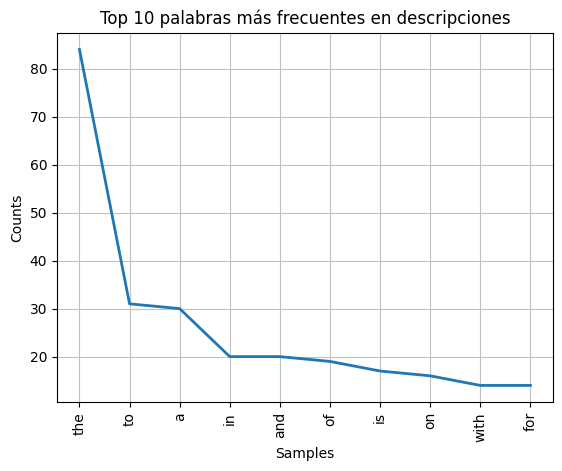

In [53]:
# Concatenar todas las descripciones en un solo texto
all_descriptions = ' '.join(df['description'])

# Tokenizar el texto
tokens = word_tokenize(all_descriptions)

# Filtrar tokens alfabéticos y convertir a minúsculas
filtered_tokens = [word.lower() for word in tokens if word.isalpha()]

# Calcular la frecuencia de las palabras
freq_dist = FreqDist(filtered_tokens)

# Mostrar las 10 palabras más comunes
print(freq_dist.most_common(10))

# Graficar las 10 palabras más comunes
freq_dist.plot(10, title='Top 10 palabras más frecuentes en descripciones')